In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pathlib

In [2]:
datapath = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file("flower_photos", origin=datapath, cache_dir="/content/drive/MyDrive/Colab Notebooks/Datasets", untar=True)

In [3]:
data_dir, type(data_dir)

('/content/drive/MyDrive/Colab Notebooks/Datasets/datasets/flower_photos', str)

In [4]:
data_dir = pathlib.Path(data_dir)
data_dir, type(data_dir)

(PosixPath('/content/drive/MyDrive/Colab Notebooks/Datasets/datasets/flower_photos'),
 pathlib.PosixPath)

In [5]:
data = list(data_dir.glob("*/*.jpg"))
data_count = len(data)
data_count

3670

In [6]:
tulip = list(data_dir.glob("tulips/*.jpg"))
tulip[0]

PosixPath('/content/drive/MyDrive/Colab Notebooks/Datasets/datasets/flower_photos/tulips/3498663243_42b39b4185_m.jpg')

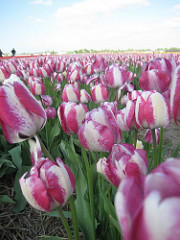

In [7]:
img = cv2.imread(str(tulip[0]),1)
cv2_imshow(img)

array([[[252, 217, 174],
        [253, 218, 175],
        [254, 219, 176],
        ...,
        [251, 232, 205],
        [249, 232, 206],
        [249, 232, 206]],

       [[253, 218, 175],
        [254, 219, 176],
        [254, 220, 177],
        ...,
        [255, 234, 206],
        [253, 234, 207],
        [253, 234, 207]],

       [[253, 219, 176],
        [254, 220, 177],
        [255, 221, 178],
        ...,
        [255, 235, 207],
        [255, 235, 208],
        [253, 233, 208]],

       ...,

       [[ 16,  18,  18],
        [ 33,  35,  35],
        [ 37,  39,  39],
        ...,
        [149, 109, 157],
        [146, 105, 156],
        [145, 103, 156]],

       [[ 19,  21,  21],
        [ 47,  49,  49],
        [ 14,  16,  16],
        ...,
        [148, 107, 158],
        [145, 103, 156],
        [143, 101, 156]],

       [[ 20,  22,  22],
        [ 35,  37,  37],
        [ 10,  12,  12],
        ...,
        [143, 101, 156],
        [140,  97, 154],
        [139,  95, 154]]], dtype=uint8)
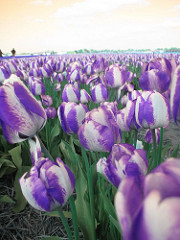

In [8]:
cv2.imread(str(tulip[0]),1)

In [9]:
flower_data = {"tulips":list(data_dir.glob("tulips/*.jpg")),
              "daisy":list(data_dir.glob("daisy/*.jpg")),
              "dandelion":list(data_dir.glob("dandelion/*.jpg")),
              "roses":list(data_dir.glob("roses/*.jpg")),
              "sunflowers":list(data_dir.glob("sunflowers/*.jpg"))}

In [10]:
flower_label = {"tulips":0,"sunflowers":1,"daisy":2,"dandelion":3,"roses":4}

In [11]:
X,y = [],[]
for flower, images in flower_data.items():
  print(f"{flower} : {len(images)}")
  for i in images:
    img = cv2.imread(str(i),1)
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img) #resizing the image and reading it in X
    y.append(flower_label[flower])

tulips : 799
daisy : 633
dandelion : 898
roses : 641
sunflowers : 699


In [12]:
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((3670, 180, 180, 3), (3670,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2936, 180, 180, 3), (734, 180, 180, 3), (2936,), (734,))

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
model = keras.Sequential([#CNN
                          keras.layers.Conv2D(100,(2,2), strides=(1,1), input_shape=(180,180,3), activation="relu"),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Conv2D(100,(2,2), strides=(1,1), activation="relu"),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Conv2D(100,(2,2), strides=(1,1), activation="relu"),
                          keras.layers.MaxPool2D((2,2)),

                          #ANN
                          keras.layers.Flatten(),
                          keras.layers.Dense(100, activation="relu"),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(5, activation="softmax")])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

model.fit(X_train, y_train, epochs=15)

Epoch 1/15
92/92 [==============================] - 14s 73ms/step - loss: 1.3600 - accuracy: 0.4234
Epoch 2/15
92/92 [==============================] - 6s 64ms/step - loss: 1.1136 - accuracy: 0.5487
Epoch 3/15
92/92 [==============================] - 6s 62ms/step - loss: 0.9989 - accuracy: 0.6035
Epoch 4/15
92/92 [==============================] - 6s 64ms/step - loss: 0.8866 - accuracy: 0.6485
Epoch 5/15
92/92 [==============================] - 6s 63ms/step - loss: 0.7513 - accuracy: 0.7105
Epoch 6/15
92/92 [==============================] - 6s 65ms/step - loss: 0.6686 - accuracy: 0.7493
Epoch 7/15
92/92 [==============================] - 6s 65ms/step - loss: 0.5499 - accuracy: 0.8059
Epoch 8/15
92/92 [==============================] - 6s 65ms/step - loss: 0.4321 - accuracy: 0.8440
Epoch 9/15
92/92 [==============================] - 6s 65ms/step - loss: 0.3420 - accuracy: 0.8767
Epoch 10/15
92/92 [==============================] - 6s 64ms/step - loss: 0.2888 - accuracy: 0.8913
Epoch 11

In [16]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 1s 42ms/step - loss: 1.1669 - accuracy: 0.7153


[1.1669089794158936, 0.7152588367462158]

In [17]:
data_augmentation = keras.Sequential([keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
                                     keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                     keras.layers.experimental.preprocessing.RandomZoom(0.4)])

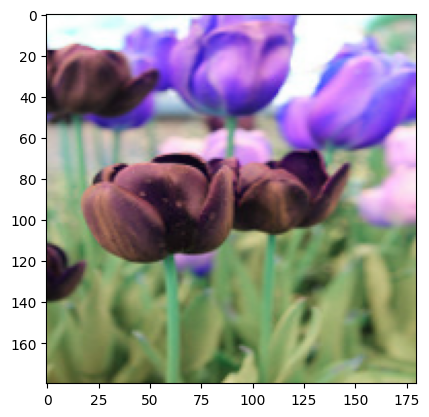

In [18]:
plt.imshow(X[2])

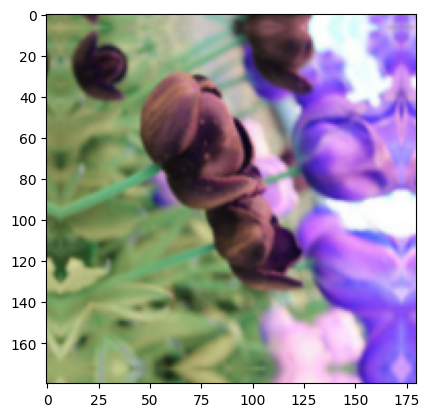

In [19]:
plt.imshow(data_augmentation(X)[2].numpy().astype("uint8"))

In [20]:
model2 = keras.Sequential([#Data Augmentation
                          keras.layers.experimental.preprocessing.RandomZoom(0.4),
                          #CNN
                          keras.layers.Conv2D(100,(2,2), strides=(1,1), input_shape=(180,180,3), activation="relu"),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Conv2D(100,(2,2), strides=(1,1), activation="relu"),
                          keras.layers.MaxPool2D((2,2)),
                          keras.layers.Conv2D(100,(2,2), strides=(1,1), activation="relu"),
                          keras.layers.MaxPool2D((2,2)),

                          #ANN
                          keras.layers.Flatten(),
                          keras.layers.Dense(100, activation="relu"),
                          keras.layers.Dense(5, activation="softmax")])

model2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics="accuracy")

model2.fit(X_train, y_train, epochs=15)

Epoch 1/15
92/92 [==============================] - 8s 68ms/step - loss: 1.3345 - accuracy: 0.4097
Epoch 2/15
92/92 [==============================] - 6s 63ms/step - loss: 1.0750 - accuracy: 0.5753
Epoch 3/15
92/92 [==============================] - 6s 65ms/step - loss: 0.9874 - accuracy: 0.6301
Epoch 4/15
92/92 [==============================] - 6s 64ms/step - loss: 0.8935 - accuracy: 0.6642
Epoch 5/15
92/92 [==============================] - 6s 69ms/step - loss: 0.7961 - accuracy: 0.6979
Epoch 6/15
92/92 [==============================] - 6s 67ms/step - loss: 0.7462 - accuracy: 0.7224
Epoch 7/15
92/92 [==============================] - 6s 67ms/step - loss: 0.6833 - accuracy: 0.7446
Epoch 8/15
92/92 [==============================] - 6s 64ms/step - loss: 0.6244 - accuracy: 0.7619
Epoch 9/15
92/92 [==============================] - 6s 66ms/step - loss: 0.5653 - accuracy: 0.8001
Epoch 10/15
92/92 [==============================] - 6s 64ms/step - loss: 0.5389 - accuracy: 0.7916
Epoch 11/

In [21]:
model2.evaluate(X_test, y_test)

23/23 [==============================] - 1s 20ms/step - loss: 0.9336 - accuracy: 0.7125


[0.9335963129997253, 0.7125340700149536]